# Star Wars Survey

This proyect is about analyzing star wars related surveys with a focus on cleaning and wrangling with the data

In [26]:
!ls data

star_wars.csv


In [27]:
# Reading the star wars data
import pandas as pd
star_wars = pd.read_csv('data/star_wars.csv', encoding= 'ISO-8859-1')

In [36]:
pd.set_option('display.max_columns', 500)

In [37]:
# Exploratory analysis of the data
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [29]:
# Inspecting the attributes on the relation
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [30]:
# There is one emtpy value that has a null in the RespondentID field
# This row is removed
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [31]:
# The'Have you seen any of the 6 films in the Star Wars franchise?' column and the 
# 'Do you consider yourself to be a fan of the Star Wars film franchise?' column are key

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [32]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [33]:
# The conversion of the 'Yes' and 'No' values to booleans can be made with the s.map method and a 
# dictionary

yn_dict = {
    'Yes': True,
    'No': False
}

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yn_dict)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yn_dict)

In [34]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [35]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [44]:
# Convering the values of columns 3 to 9 to booleans

movies = star_wars.columns[3:9]

for movie in movies:
    star_wars[movie] = star_wars[movie].notna()
    print(star_wars[movie].value_counts(dropna= False))

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


In [49]:
# Renaming the seen movies related attributes
seen_movie_dict = {
    'Which of the following Star Wars films have you seen? Please select all that apply.' : 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
}

star_wars = star_wars.rename(columns = seen_movie_dict)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [51]:
# Converting the rating related columns to numbers

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [53]:
# Changing the name of rating related columns 

rating_names = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}

star_wars.rename(columns = rating_names, inplace = True)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [56]:
# Inspecting the column with the highest average ranking

star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

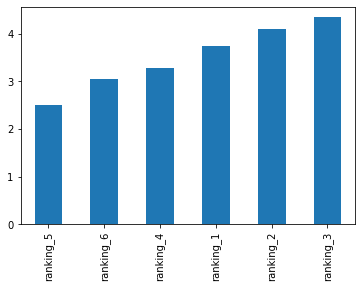

In [60]:
# Plotting the rankings from each movie
star_wars[star_wars.columns[9:15]].mean().sort_values().plot.bar()

The most liked movie seems to be the fifth one from star wars.

In [65]:
# Getting the number of people that has seen each movie
star_wars[star_wars.columns[3:9]].sum().sort_values(ascending = False)

seen_5    758
seen_6    738
seen_1    673
seen_4    607
seen_2    571
seen_3    550
dtype: int64

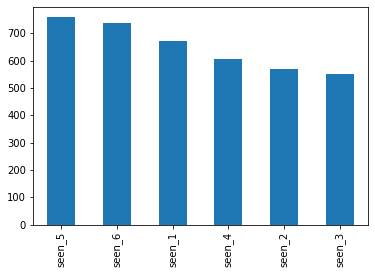

In [66]:
# Plotting the number of people that has seen each movie

star_wars[star_wars.columns[3:9]].sum().sort_values(ascending = False).plot.bar()

It seems that the most seen movie is the 5th episode

In [67]:
grouped_by_genre = star_wars.groupby('Gender')

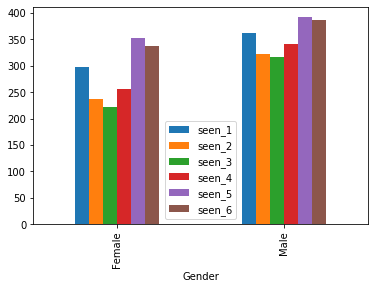

In [70]:
grouped_by_genre[star_wars.columns[3:9]].sum().plot.bar()

In [72]:
# Analyzing differences by gender
grouped_by_genre[star_wars.columns[9:15]].mean()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Gender,,,,,,
Female,3.429293,3.954660,4.418136,3.544081,2.569270,3.078086
Male,4.037825,4.224586,4.274882,2.997636,2.458629,3.002364


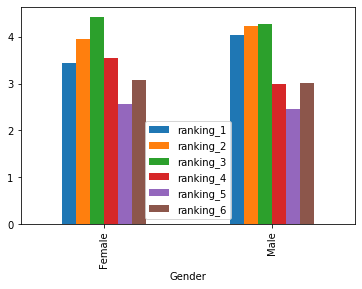

In [74]:
grouped_by_genre[star_wars.columns[9:15]].mean().plot.bar()

Apparently, both male and female watch more the 5th episode of Star Wars and also both liked this episode more. Females seems to dislike the 3th episode more than men. 

In [75]:
# We could also analyze the data by splitting those that are fans and those that are not fans
grouped_by_fans = star_wars.groupby('Do you consider yourself to be a fan of the Star Wars film franchise?')

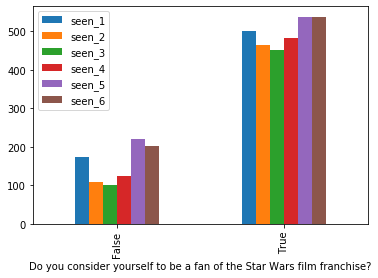

In [77]:
grouped_by_fans[star_wars.columns[3:9]].sum().plot.bar()

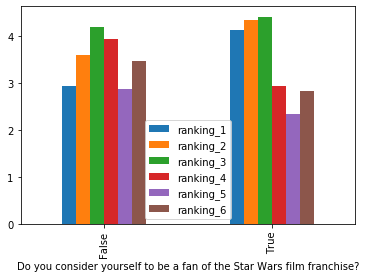

In [78]:
grouped_by_fans[star_wars.columns[9:15]].mean().plot.bar()

The most watched film by fans is the 5th and 6th episode and the mosth watched film by no fans is the 6th episode. The best rated movie is the 5th episode. There is a curious fact: Fans seems to dislike the first three episodes more than those that are no fans.

In [79]:
# Analyzing data by splittin the group on those that are star trek fans and those who are not.
group_by_startreck = star_wars.groupby('Do you consider yourself to be a fan of the Star Trek franchise?')

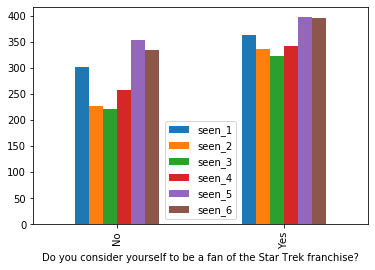

In [81]:
group_by_startreck[star_wars.columns[3:9]].sum().plot.bar()

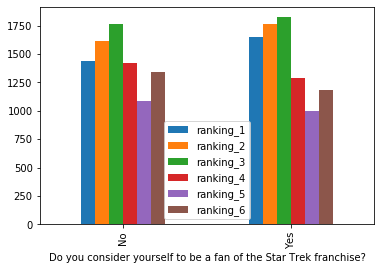

In [82]:
group_by_startreck[star_wars.columns[9:15]].sum().plot.bar()

There seems that the times a movie has been wathed is very similar to the graph of those that are fans of star wars. Also, the rating are pretty similar between startreck fans and those that are not fans of startreck.

In [83]:
# Inspecting the data by age
grouped_by_age = star_wars.groupby('Age')

In [90]:
watched_by_age = grouped_by_age[star_wars.columns[3:9]].sum()
watched_by_age

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Age,,,,,,
18-29,160.0,148.0,145.0,152.0,160.0,160.0
30-44,175.0,158.0,152.0,176.0,197.0,197.0
45-60,181.0,148.0,142.0,165.0,220.0,210.0
> 60,143.0,106.0,100.0,104.0,168.0,158.0


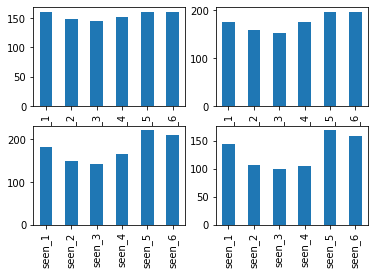

In [101]:
#Checking the distribution by age
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2)
watched_by_age.loc['18-29'].plot.bar(ax = axes[0,0])
watched_by_age.loc['30-44'].plot.bar(ax = axes[0,1])
watched_by_age.loc['45-60'].plot.bar(ax = axes[1,0])
watched_by_age.loc['> 60'].plot.bar(ax = axes[1,1])

In [98]:
ranking_by_age = grouped_by_age[star_wars.columns[9:15]].mean()
ranking_by_age

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Age,,,,,,
18-29,4.100000,4.100000,3.966667,2.994444,2.722222,3.116667
30-44,4.347826,4.309179,4.475728,2.932367,2.212560,2.714976
45-60,3.541667,4.170833,4.537500,3.308333,2.437500,3.004167
> 60,3.010417,3.761658,4.316062,3.808290,2.730570,3.357513


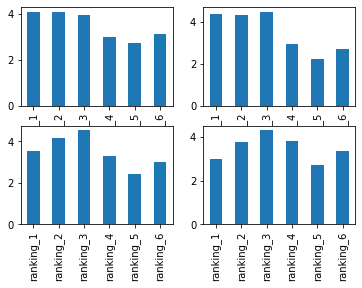

In [102]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
ranking_by_age.loc['18-29'].plot.bar(ax = axes[0,0])
ranking_by_age.loc['30-44'].plot.bar(ax = axes[0,1])
ranking_by_age.loc['45-60'].plot.bar(ax = axes[1,0])
ranking_by_age.loc['> 60'].plot.bar(ax = axes[1,1])

People between 18 and 29 have a pretty much distributed way of watching all the episodes. As age increases, people tend to watch the 5th and 6th episodes more than the others, probably because they have seen them all and just rewatch those they liked (this is consistent with the fact that the 5th and 6th episodes have the higher ratings). 

Nevertheless, older people seem to enjoy the first and second episode more than younger people, but dislike the 3th episode the most. 